In [10]:
import glob, os
import pandas as pd

In [11]:
target_path= "./clean_data/2016/Break*"

FILENAMES = glob.glob(target_path, recursive = True)
FILENAMES[0:7]

[]

In [12]:
def rename(filename):
    components = filename.split(" ") #splits on the space
    os.rename(filename, "./clean_data/2016/Week_{}_Feedback_-_{}".format(components[3], components[6]))


In [13]:
# # Run Loop on all filenames in the folder. 
for file in FILENAMES:
    rename(file)

In [14]:
# Grab new filenames with GLOB 
# Note that we need a new filepath after preforming the loop
target_path= "./clean_data/2016/Week*"


FILENAMES = glob.glob(target_path, recursive = True)
# Return first 8 entries in FILENAMES LIST
FILENAMES[0:7]

['./clean_data/2016/Week_1_Feedback_-_NY.csv',
 './clean_data/2016/Week_2_Feedback_-_SV.csv',
 './clean_data/2016/Week_3_Feedback_-_SG.csv',
 './clean_data/2016/Week_3_Feedback_-_SF.csv',
 './clean_data/2016/Week_6_Feedback_-_SG.csv',
 './clean_data/2016/Week_7_Feedback_-_SV.csv',
 './clean_data/2016/Week_4_Feedback_-_NY.csv']

In [15]:
# How many files have the fist row as unamed?
len(FILENAMES)

39

In [16]:
DF1 = pd.read_csv(FILENAMES[0],  sep='\t')
DF1.head()

,",no_name,merit badge,Timestamp,rateing,pace,week_num,location"
0,"0,0,astronomy,6/24/2016 7:03:34,3,5,1,NY"
1,"1,1,astronomy,6/24/2016 7:10:22,3,3,1,NY"
2,"2,2,rowing,6/24/2016 7:03:41,3,3,1,NY"
3,"3,3,rowing,6/24/2016 7:04:59,4,3,1,NY"
4,"4,4,rowing,6/24/2016 7:07:02,4,4,1,NY"


# Find unique headers

In [17]:
# Create list
headers=[]
def find_headers(filename):
    dataframe= pd.read_csv(filename, sep='\t')
    listA = list(dataframe)
    for value in listA:
            headers.append(value)       
    
def find_unique(list, new_list):
    for x in list:
        if x not in new_list:
            new_list.append(x)

In [18]:
'Unnamed: 0' 'Unnamed: 0.1'

'Unnamed: 0Unnamed: 0.1'

In [19]:
# Run find headers through a loop with all files
for file in FILENAMES:
    find_headers(file)

unique_headers = []
find_unique(headers, unique_headers)
    # apply unique to that list.
unique_headers
#display u_headers


[',no_name,merit badge,Timestamp,rateing,pace,week_num,location',
 ',no_name,Timestamp,merit badge,rateing,pace,week_num,location',
 ',no_name,Timestamp,rateing,pace,week_num,location',
 ',no_name,no_name,merit badge,rateing,pace,week_num,location',
 ',no_name,merit badge,rateing,pace,week_num,location']

In [20]:
head_map = {
    'Unnamed: 0': 'no_name',
    'What Marrit Badge?':'merit badge',
    'How would you rate your satisfaction with the Break Camp this week?:':'rateing',
    'How would you rate your satisfaction with the Break Camp this week?':'rateing',
    'How well is the program paced?': "pace",
    'Timestamp': "Timestamp",
    'How well are the tutorials paced?':"pace",
    'Unnamed: 0.1':'no_name'
}


In [21]:
head_map

{'Unnamed: 0': 'no_name',
 'What Marrit Badge?': 'merit badge',
 'How would you rate your satisfaction with the Break Camp this week?:': 'rateing',
 'How would you rate your satisfaction with the Break Camp this week?': 'rateing',
 'How well is the program paced?': 'pace',
 'Timestamp': 'Timestamp',
 'How well are the tutorials paced?': 'pace',
 'Unnamed: 0.1': 'no_name'}

In [22]:
badges = []

def all_badges(filename):
    track_n = pd.read_csv(filename, sep='\t')
    try:
        badges.append(track_n['What Marrit Badge?'].values)
    except:
        pass
    
def sublist_extract(list_of_list, new_list):
    for sublist in list_of_list:
        for item in sublist:
            new_list.append(item)  

In [23]:
FILENAMES[0:5]

['./clean_data/2016/Week_1_Feedback_-_NY.csv',
 './clean_data/2016/Week_2_Feedback_-_SV.csv',
 './clean_data/2016/Week_3_Feedback_-_SG.csv',
 './clean_data/2016/Week_3_Feedback_-_SF.csv',
 './clean_data/2016/Week_6_Feedback_-_SG.csv']

In [24]:
for file in FILENAMES:
    all_badges(file)

flat_badges = []
unique_badges = []
sublist_extract(badges,flat_badges)
flat_badges 

find_unique(flat_badges, unique_badges)
# unique_badges
unique_badges

[]

In [25]:
badge_map = {
    'Rowing': 'rowing', 
    'Astrnomy':'astronomy', 
    'Intro Rowing': 'rowing', 
    'Computer Programing':'computer programing', 
    'Average:':'Average:'
}

In [26]:

def scrubba_dub_dubb(filename):
    # Open a file as a data frame (.pd.read_csv())
    DF = pd.read_csv(filename, sep='\t')
    
#   Rename the headers. (.rename()))
    DF.rename(columns=head_map, inplace=True)
    
#   Standardize the Badge columns(ex. change "games" to "sports") (.map())
    try:
        DF['merit badge']= DF['merit badge'].map(badge_map)
    except:
        filename=filename
    # Take the week and location from the filename and apply it to each instance in new fields.
    fileparts = filename.split("_")
    DF["week_num"] = fileparts[2]
    DF["location"] = fileparts[5].split(".")[0]
    
    # save to a .csv file overwrites existing file
    DF.to_csv(filename)


In [27]:
# for file in FILENAMES:
#     scrubba_dub_dubb(file)

In [28]:
len(FILENAMES)

39

In [29]:
list_of_dfs = list()
for x in range(1, (len(FILENAMES)-1)):
    apendee = pd.read_csv(FILENAMES[x])
    list_of_dfs.append(apendee)

In [30]:
big_fat_DF= pd.concat(list_of_dfs, sort=True)

In [31]:
big_fat_DF

,Timestamp,Unnamed: 0,location,merit badge,no_name,no_name.1,pace,rateing,week_num
0,7/1/2016 13:27:56,0,SV,rowing,0,NaN,4,3,2
1,7/1/2016 13:29:33,1,SV,rowing,1,NaN,5,3,2
2,7/1/2016 13:29:43,2,SV,rowing,2,NaN,3,3,2
3,7/1/2016 13:30:28,3,SV,rowing,3,NaN,4,3,2
4,7/1/2016 13:34:11,4,SV,rowing,4,NaN,3,3,2
5,7/1/2016 13:35:20,5,SV,rowing,5,NaN,3,3,2
6,7/1/2016 16:35:14,6,SV,rowing,6,NaN,3,3,2
7,7/1/2016 17:01:13,7,SV,rowing,7,NaN,4,3,2
8,7/2/2016 9:50:36,8,SV,rowing,8,NaN,3,3,2
9,7/1/2016 10:36:57,9,SV,astronomy,9,NaN,3,3,2


In [32]:
big_fat_DF.drop(columns=["Unnamed: 0"], inplace=True)
big_fat_DF.drop(columns=["no_name"], inplace=True)
big_fat_DF.drop(columns=["no_name.1"], inplace=True)

In [33]:
big_fat_DF.head()

,Timestamp,location,merit badge,pace,rateing,week_num
0,7/1/2016 13:27:56,SV,rowing,4,3,2
1,7/1/2016 13:29:33,SV,rowing,5,3,2
2,7/1/2016 13:29:43,SV,rowing,3,3,2
3,7/1/2016 13:30:28,SV,rowing,4,3,2
4,7/1/2016 13:34:11,SV,rowing,3,3,2


In [34]:
# Drop row where df["merit badge"]= "Average:"

big_fat_DF[big_fat_DF["merit badge"]== "Average:"]

,Timestamp,location,merit badge,pace,rateing,week_num
33,NaN,SV,Average:,#REF!,#REF!,3


In [35]:
big_fat_DF = big_fat_DF[big_fat_DF["merit badge"]!= "Average:"]

In [36]:
big_fat_DF[big_fat_DF["merit badge"]== "Average:"]

,Timestamp,location,merit badge,pace,rateing,week_num


In [37]:
big_fat_DF.to_csv("./clean_data/big_fat.csv")

In [38]:
FILENAMES[1]

'./clean_data/2016/Week_2_Feedback_-_SV.csv'

# Now make some pretty visuals:


In [39]:
big_fat_DF = pd.read_csv("./clean_data/big_fat.csv")

In [40]:
# pi chart
import matplotlib.pyplot as plt

In [41]:
nps_df = big_fat_DF["merit badge"].value_counts()
LABELS = ['Detractor', 'Promoter', 'Passive']
colors = ['lightcoral', 'yellowgreen', 'yellow']

In [42]:
# plt.pie(nps_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)

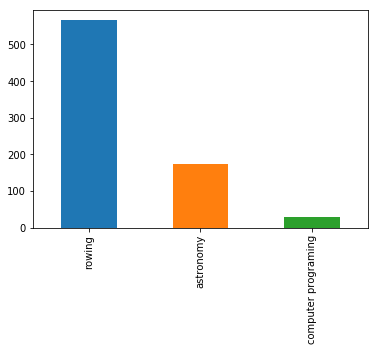

In [43]:
nps_df.plot(kind="bar")

In [57]:
big_fat_DF.head()

,Unnamed: 0,Timestamp,location,merit badge,pace,rateing,week_num
0,0,7/1/2016 13:27:56,SV,rowing,4,3,2
1,1,7/1/2016 13:29:33,SV,rowing,5,3,2
2,2,7/1/2016 13:29:43,SV,rowing,3,3,2
3,3,7/1/2016 13:30:28,SV,rowing,4,3,2
4,4,7/1/2016 13:34:11,SV,rowing,3,3,2


In [44]:
# plt.pie(pi_val, labels = LABELS,  autopct='%1.1f%%', shadow=True)

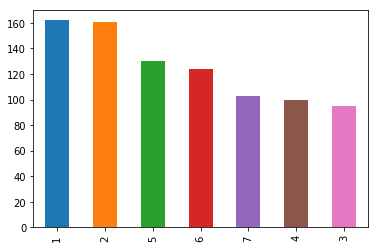

In [56]:
order = [1, 2, 3, 4, 5, 6, 7]



big_fat_DF["week_num"].value_counts().plot(kind="bar")

In [53]:
NPS16A=df[df['year']==2016][df['NPS']=="Detractor"]['pacing']

ratings_order = ['1', '2', '3', '4', '5']
NPS16A.value_counts().loc[ratings_order].plot(kind="bar")

NameError: name 'df' is not defined

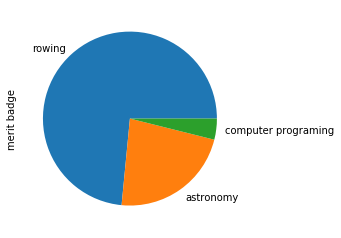

In [59]:
big_fat_DF["merit badge"].value_counts().plot(kind="pie")

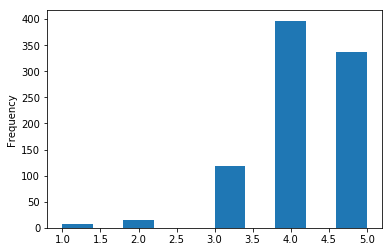

In [72]:
big_fat_DF["rateing"].plot(kind="hist")

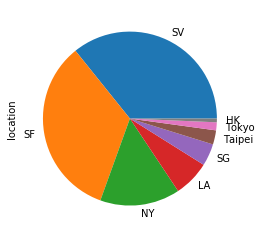

In [75]:
big_fat_DF["location"].value_counts().plot(kind="pie")